<a href="https://colab.research.google.com/github/TruongScotl/Recommend_System/blob/main/Actress_Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
actress_data = pd.read_json('/content/acctress.json')
actress_data

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都
...,...,...,...,...,...,...,...,...,...,...,...,...
11181,10538,Tomita Sayaka,富田さやか,とみたさやか,80.0,60.0,83.0,NaN,1980-12-05,O,料理、お買い物,None
11182,10540,Mizimoto Miwa,藤本美羽,ふじもとみわ,88.0,58.0,87.0,153.0,1984-08-28,O,ショッピング、料理,東京都
11183,10542,Nakahara Risako,中原りさこ,なかはらりさこ,84.0,59.0,86.0,150.0,None,None,None,None
11184,10544,Sugimoto Ayako,希崎圭蓮（杉本彩子）,きさきかれん（すぎもとあやこ）,90.0,63.0,87.0,150.0,None,None,None,None


In [ ]:
actress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


Text(0.5, 1.0, 'Biểu đồ phân bố số đo vòng 1 của diễn viên')

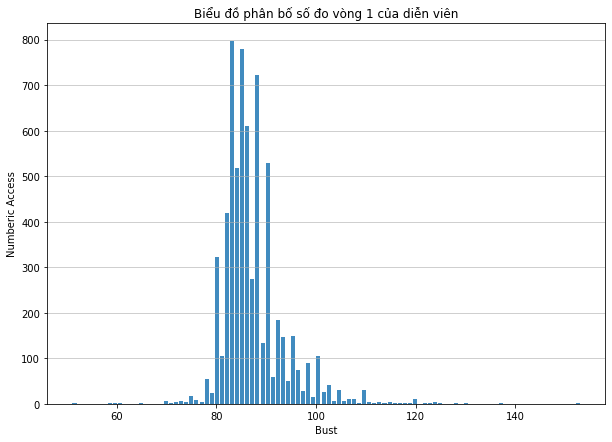

In [ ]:
#Histgorm bust
plt.figure(figsize=(10,7))
actress_bust = actress_data['bust']
plt.hist(x = actress_bust, bins = 100, alpha = 0.85, rwidth= 0.8)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Bust')
plt.ylabel('Numberic Access')
plt.title('Biểu đồ phân bố số đo vòng 1 của diễn viên')

In [ ]:
#get age of actress
o = pd.to_datetime(actress_data['birthday'], yearfirst = True)
actress_data['age'] = 2021 - pd.DatetimeIndex(actress_data['birthday']).year

In [ ]:
actress_data.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0


In [ ]:
actress_data[actress_data['age'] == actress_data['age'].min()] 

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
9826,1059504,Maki Izuna,槙いずな,まきいずな,80.0,55.0,84.0,148.0,2001-01-27,None,読書,東京都,20.0
9933,1061822,Takeda Erena,武田エレナ,たけだえれな,NaN,NaN,NaN,NaN,2001-08-08,None,None,静岡県,20.0


![maki](https://gamek.mediacdn.vn/thumb_w/640/133514250583805952/2020/10/24/-1603523137131278327845.jpg)

In [ ]:
actress_data['age'].describe()

count    4031.000000
mean       36.704788
std         7.262923
min        20.000000
25%        32.000000
50%        36.000000
75%        41.000000
max        66.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Biểu đồ phân bố độ tuổi của diễn viên')

<Figure size 432x504 with 0 Axes>

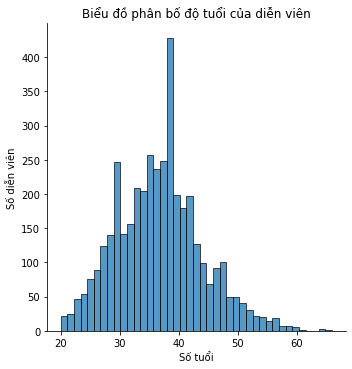

In [ ]:
#xu li nan
# actress_data['age'] = actress_data.age.fillna(36)
#ve hinh hist gram 
plt.figure(figsize = (6,7))
sns.displot(actress_data.age.dropna())
plt.ylabel('Số diễn viên')
plt.xlabel('Số tuổi')
plt.title("Biểu đồ phân bố độ tuổi của diễn viên")

In [ ]:
#tim ten dien vien 
actress_data[actress_data.name.str.contains('Mikami')]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
94,1117,Mikami Sati,三上さち,みかみさち,NaN,NaN,NaN,NaN,None,None,None,None,NaN
95,1118,Mikami Syun,三上しゅん,みかみしゅん,NaN,NaN,NaN,NaN,None,None,None,None,NaN
96,1119,Mikami Ran,三上蘭,みかみらん,84.0,59.0,86.0,NaN,1982-12-16,O,None,None,39.0
625,13127,Mikami Runa,美神ルナ,みかみるな,88.0,58.0,85.0,163.0,1984-06-01,O,ダンス、旅行、ダイビング、英会話,東京都,37.0
677,13586,Mikami Yuuki,三上夕希,みかみゆうき,86.0,65.0,89.0,168.0,None,None,None,None,NaN
1762,20124,Mikami Seri,美上セリ,みかみせり,83.0,58.0,82.0,160.0,1987-03-15,B,ショッピング、ダーツ,東京都,34.0
2258,22162,Mikami Nana,美神奈々,みかみなな,NaN,NaN,NaN,NaN,None,None,None,None,NaN
3207,26885,Mikami Sihori,三神しほり,みかみしほり,NaN,NaN,NaN,NaN,None,None,None,,NaN
3305,27668,Mikami Rion,三上リオン,みかみりおん,88.0,59.0,82.0,147.0,None,None,,,NaN
3391,27889,Mikami Seira,美神聖良,みかみせいら,NaN,NaN,NaN,NaN,None,None,None,,NaN


![yua mikami](https://gamek.mediacdn.vn/133514250583805952/2021/2/8/photo-1-16127631379721012782242.jpg)

In [ ]:
from wordcloud import WordCloud
hobby_df = actress_data[actress_data.hobby.notnull()]
hobby_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3730 non-null   int64  
 1   name         3730 non-null   object 
 2   japanName    3730 non-null   object 
 3   hiragana     3730 non-null   object 
 4   bust         3523 non-null   float64
 5   waist        3539 non-null   float64
 6   hip          3539 non-null   float64
 7   height       3045 non-null   float64
 8   birthday     3056 non-null   object 
 9   blood_type   2610 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  2665 non-null   object 
 12  age          3056 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 408.0+ KB


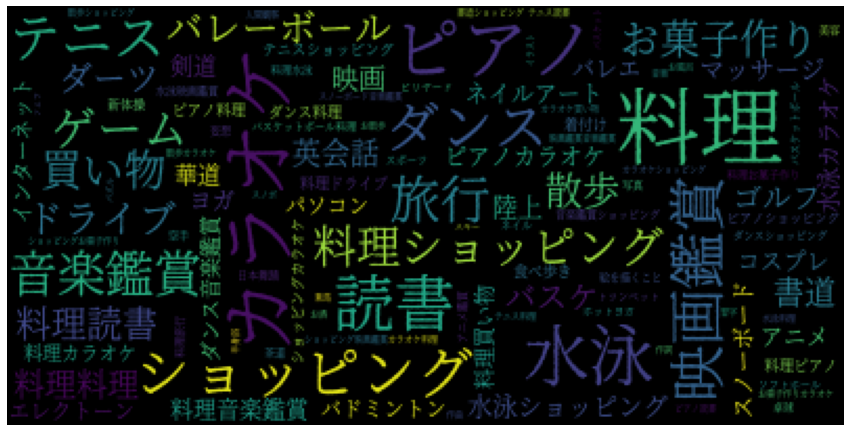

In [ ]:
hobby_txt = ''.join(hobby_df['hobby'])
wordcloud = WordCloud(font_path='/content/jp.otf', max_words = 200, max_font_size=40).generate(hobby_txt)

plt.figure(figsize = (15,16))
plt.imshow(wordcloud)
plt.axis('off') #tat vien
plt.show()

In [ ]:
#thiet ke he thong recommend
actress = actress_data[['bust', 'waist','hip','height','blood_type']]
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [ ]:
#oneshot co ban
actress = actress.dropna()
mapper = {'A':1,'O':0,'B':2,'AB':3 }
actress['blood_type'] = actress['blood_type'].map(mapper)
actress.tail()

,bust,waist,hip,height,blood_type
11172,83.0,60.0,85.0,161.0,1
11173,86.0,58.0,84.0,158.0,0
11176,83.0,58.0,85.0,165.0,0
11182,88.0,58.0,87.0,153.0,0
11185,88.0,59.0,86.0,161.0,2


In [ ]:
actress_np = actress.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [ ]:
# elbow method
sum_distances = []
K = range(1,15)
for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(actress_np)
  sum_distances.append(k_mean.inertia_)

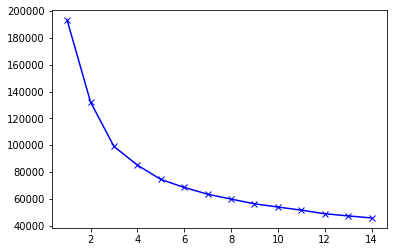

In [ ]:
plt.plot(K, sum_distances,'bx-')
plt.show()

In [ ]:
k_mean = KMeans(n_clusters=3)
model = k_mean.fit(actress_np)
result = k_mean.labels_

In [ ]:
metrics.silhouette_score(actress_np, result, metric= 'euclidean')

0.3043234849568844

In [ ]:
metrics.calinski_harabasz_score(actress_np, result)

1271.410864107087

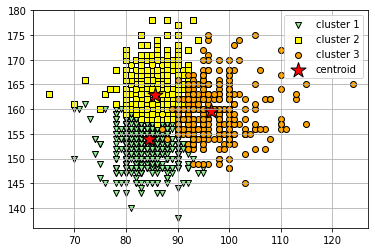

In [ ]:
#Ve phan cum (cluster)
plt.scatter(
    actress_np[result == 0,0], actress_np[result == 0,3],
    c = 'lightgreen',
    marker = 'v', edgecolors = 'black',
    label ='cluster 1'
)
plt.scatter(
    actress_np[result == 1,0], actress_np[result == 1,3],
    c = 'yellow',
    marker ='s', edgecolors = 'black',
    label = 'cluster 2'
)
plt.scatter(
    actress_np[result == 2,0], actress_np[result == 2,3],
    c = 'orange',
    marker ='o', edgecolors = 'black',
    label = 'cluster 3'
)
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:,3],
    s = 250,
    marker ='*', edgecolors = 'black',
    c = 'red',
    label= 'centroid'
)

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [ ]:
df1 = actress_data[['id', 'bust', 'waist', 'hip', 'height', 'blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [ ]:
df2 = actress_data[['id','name','japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [ ]:
lookup = df1.merge(df2, on = 'id', how ='left')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [ ]:
lookup['cluster'] = result
lookup.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,0
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,2
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,1
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,1
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,1


In [ ]:
def Recommend(model, vong1, vong2, vong3, chieucao, nhommau):
  arr = np.array([[vong1, vong2, vong3, chieucao, nhommau]])
  pre = model.predict(arr)
  return lookup[lookup['cluster'] == pre[0]].sample(5)

In [ ]:
vong1 = 75
vong2 = 55
vong3 = 80
chieucao = 170
nhommau = 3
Recommend(model, vong1, vong2, vong3, chieucao, nhommau)

![Hinata marin](https://gamek.mediacdn.vn/133514250583805952/2020/5/13/-1589358618330534176075.jpg)